<a href="https://colab.research.google.com/github/ivnattt/Plutchik_VAD_classification/blob/master/0Plutchik_VAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk

In [2]:
from nltk.corpus import stopwords

In [3]:
import re

In [4]:
sentence="""During my lifetime I have dedicated myself to this struggle of the African people I have fought against white domination, and I have fought against black domination I have cherished the ideal of a democratic and free society in which all persons live together in harmony and with equal opportunities It is an ideal which I hope to live for and to achieve But if needs be, it is an ideal for which I am prepared to die."""

In [5]:
import pandas as pd

In [6]:
from google.colab import files
#upload 8 emo here
uploaded = files.upload()

Saving FIRST_8_EMO.xlsx to FIRST_8_EMO.xlsx


In [7]:
uploaded_v = files.upload()

Saving VAD.xlsx to VAD.xlsx


In [15]:
import io

# data=pd.read_excel("FIRST_8_EMO.xlsx")
# data_vad=pd.read_excel("VAD.xlsx")

data = pd.ExcelFile(io.BytesIO(uploaded['FIRST_8_EMO.xlsx']))
data = pd.read_excel(data)
data_vad = pd.ExcelFile(io.BytesIO(uploaded_v['VAD.xlsx']))
data_vad = pd.read_excel(data_vad)



In [16]:
data.head()

,word,emotion,emotion-intensity-score
0,outraged,anger,0.964
1,brutality,anger,0.959
2,hatred,anger,0.953
3,hateful,anger,0.940
4,terrorize,anger,0.939


In [17]:
data.fillna(0, inplace=True)
datas=pd.get_dummies(data, columns=['emotion'])
datas

,word,emotion-intensity-score,emotion_anger,emotion_anticipation,emotion_disgust,emotion_fear,emotion_joy,emotion_sadness,emotion_surprise,emotion_trust
0,outraged,0.964,1,0,0,0,0,0,0,0
1,brutality,0.959,1,0,0,0,0,0,0,0
2,hatred,0.953,1,0,0,0,0,0,0,0
3,hateful,0.940,1,0,0,0,0,0,0,0
4,terrorize,0.939,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9916,fugitive,0.141,0,0,0,0,0,0,0,1
9917,divorce,0.133,0,0,0,0,0,0,0,1
9918,mistakes,0.133,0,0,0,0,0,0,0,1
9919,bait,0.133,0,0,0,0,0,0,0,1


In [18]:

datas['emotion_sadness']=datas['emotion_sadness'].multiply(datas['emotion-intensity-score'])
datas['emotion_anger']=datas['emotion_anger'].multiply(datas['emotion-intensity-score'])
datas['emotion_anticipation']=datas['emotion_anticipation'].multiply(datas['emotion-intensity-score'])
datas['emotion_fear']=datas['emotion_fear'].multiply(datas['emotion-intensity-score'])

datas['emotion_joy']=datas['emotion_joy'].multiply(datas['emotion-intensity-score'])
datas['emotion_disgust']=datas['emotion_disgust'].multiply(datas['emotion-intensity-score'])
datas['emotion_surprise']=datas['emotion_surprise'].multiply(datas['emotion-intensity-score'])
datas['emotion_trust']=datas['emotion_trust'].multiply(datas['emotion-intensity-score'])

del datas['emotion-intensity-score']
datas

,word,emotion_anger,emotion_anticipation,emotion_disgust,emotion_fear,emotion_joy,emotion_sadness,emotion_surprise,emotion_trust
0,outraged,0.964,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,brutality,0.959,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,hatred,0.953,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,hateful,0.940,0.0,0.0,0.0,0.0,0.0,0.0,0.000
4,terrorize,0.939,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...
9916,fugitive,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.141
9917,divorce,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.133
9918,mistakes,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.133
9919,bait,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.133


In [19]:
data_vad

,Word,Valence,Arousal,Dominance
0,aaaaaaah,0.479,0.606,0.291
1,aaaah,0.520,0.636,0.282
2,aardvark,0.427,0.490,0.437
3,aback,0.385,0.407,0.288
4,abacus,0.510,0.276,0.485
...,...,...,...,...
20002,zoo,0.760,0.520,0.580
20003,zoological,0.667,0.458,0.492
20004,zoology,0.568,0.347,0.509
20005,zoom,0.490,0.520,0.462


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
   
    text = text.lower() 
    return text

stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text if not w in stop_words]
    return ' '.join(no_stopword_text)

In [ ]:
def score_vad(sentence):
    corpuso=clean_text(sentence)
    corpuso=corpuso.split(' ')
    corpuso=remove_stopwords(corpuso)
    corpuso=corpuso.split(' ')
    return data_vad.loc[data_vad['Word'].isin(corpuso)].sum(axis = 0, skipna = True)[1:]

def score_emo(sentence):
    corpuso=clean_text(sentence)
    corpuso=corpuso.split(' ')
    corpuso=remove_stopwords(corpuso)
    corpuso=corpuso.split(' ')
    return datas.loc[datas['word'].isin(corpuso)].sum(axis = 0, skipna = True)[1:]

In [ ]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [ ]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
blob = TextBlob(sentence, analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=0.9999668623660526, p_neg=3.3137633951578656e-05)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

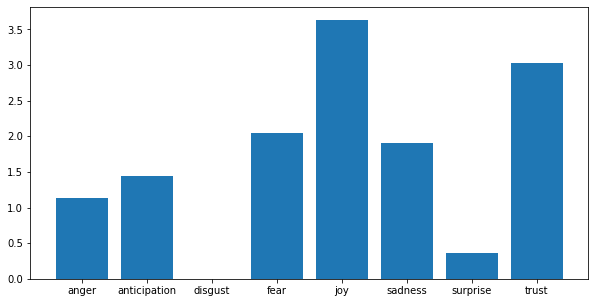

In [ ]:
plt.figure(figsize=(10, 5))

plt.bar(['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust'] ,score_emo(sentence))
plt.show()

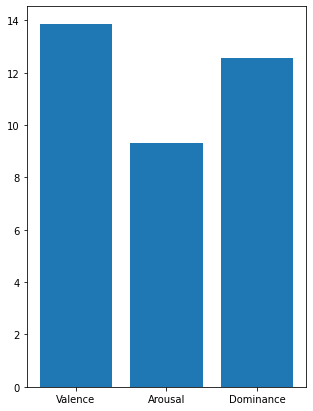

In [ ]:
plt.figure(figsize=(5, 7))

plt.bar(['Valence', 'Arousal', 'Dominance'] ,score_vad(sentence))

plt.show()

In [ ]:
#OUTPUT : score_vad(sentence) or score_emo(sentence)

In [ ]:
#pickle

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.corpus import wordnet
corpuso = ['lifetime']
for syn in wordnet.synsets(corpuso[0]):
        synonyms = []
        antonyms = []
        for l in syn.lemmas():
            synonyms.append(l.name())
            if l.antonyms():
                antonyms.append(l.antonyms()[0].name())
   
k=[synonyms, antonyms]
print(k[0])

['life', 'lifetime', 'life-time', 'lifespan']


In [ ]:
from nltk.corpus import wordnet

data=[]
corpuso=clean_text(sentence)
corpuso=corpuso.split(' ')
corpuso=remove_stopwords(corpuso)
corpuso=corpuso.split(' ')

for i in range(0, len(corpuso)):
    for syn in wordnet.synsets(corpuso[i]):
        synonyms = []
        antonyms = []
        for l in syn.lemmas():
            synonyms.append(l.name())
            if l.antonyms():
                antonyms.append(l.antonyms()[0].name())
   
    k=[synonyms, antonyms]
    data.append(k)

In [ ]:
pd.DataFrame(data, columns=["Synonym", "Antonym"], index=corpuso)

,Synonym,Antonym
lifetime,"[life, lifetime, life-time, lifespan]",[]
dedicated,"[consecrated, consecrate, dedicated]",[desecrated]
struggle,"[contend, fight, struggle]",[]
african,[African],[]
people,[people],[]
fought,"[crusade, fight, press, campaign, push, agitate]",[]
white,[white],[]
domination,"[domination, mastery, supremacy]",[]
fought,"[crusade, fight, press, campaign, push, agitate]",[]
black,"[black, smutty]",[]
